# **Lead Conversion Prediction Model using Machine Learning**

This model predicts the likelihood of a lead converting into a customer using machine learning. It includes:  

- **Importing Data**: Loading lead data from CSV or database.  
- **Data Processing**: Cleaning and preparing lead data (demographics, engagement, interactions).  
- **Feature Engineering**: Encoding categorical variables and scaling numerical data.  
- **Model Training**: Using algorithms like Logistic Regression, Random Forest, or XGBoost.  
- **Performance Evaluation**: Metrics like accuracy, precision, and recall.  
- **Deployment**: Implemented with **Streamlit** for real-time lead scoring.  

This model helps businesses identify high-potential leads and improve conversion rates. 🚀


### 1.Importing libries 

In [21]:
import numpy as np  # NumPy: Numerical computing  
import pandas as pd  # Pandas: Data manipulation  
import matplotlib.pyplot as plt  # Matplotlib: Customizable data visualization (low level) 
import seaborn as sns  # Seaborn: High-level statistical visualization (built on Matplotlib)  (high level)


### 2. Loading dataset

In [22]:
df=pd.read_csv('Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 3.Exploratory Data Analysis (EDA)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are to many Categorical columns and 3 integers and 2 float columns 

#### A)Removing not required columns 

In [24]:
df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

#### B) Binary conversion

# **Data Encoding in Machine Learning**

### **What is Data Encoding?**
Data encoding is the process of converting categorical variables into numerical format so that machine learning models can process them effectively.

## **Types of Data Encoding**

### 1️⃣ **Label Encoding**
- Assigns a unique integer to each category.
- Used for **ordinal** categorical data (where order matters).
- Example:
  - `["Low", "Medium", "High"] → [0, 1, 2]`
- **Limitation**: Can create an unintended ranking effect in non-ordinal data.

### 2️⃣ **One-Hot Encoding**
- Creates separate binary columns for each category.
- Used for **nominal** categorical data (where order doesn’t matter).
- Example:


In [25]:
from sklearn.preprocessing import LabelEncoder
# Convert binary 'Yes'/'No' columns to 1/0 using Label Encoding
binary_cols = [
    "Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article",
    "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations",
    "Receive More Updates About Our Courses", "Update me on Supply Chain Content",
    "Get updates on DM Content", "I agree to pay the amount through cheque",
    "A free copy of Mastering The Interview"
]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col].astype(str))

#### C) checking for Null values 

In [26]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

# **Missing Value Imputation**

This method is used to handle missing values in a dataset by replacing them with appropriate statistical measures.

## **Types of Imputation Used in the Code**
1. **Median Imputation (For Numeric Columns)**
   - Replaces missing values in numerical columns with the **median**.
   - Helps reduce the effect of outliers and skewed distributions.
   
2. **Mode Imputation (For Categorical Columns)**
   - Replaces missing values in categorical columns with the **mode** (most frequent value).
   - Ensures consistency by filling missing categories with the most common one.

## **Why Use This Approach?**
- Prevents data loss by imputing missing values instead of removing rows.
- Ensures better model performance by maintaining data consistency.
- Avoids bias introduced by mean imputation in skewed datasets.

This technique is widely used in data preprocessing to improve data quality before applying machine learning models. 🚀


In [27]:
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['number']).columns  # Selects all numerical columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Replaces missing values with the median of each column

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns  # Selects all categorical columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Replaces missing values with the most frequent value (mode) in each column


In [28]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [29]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int32  
 3   Do Not Call                                    9240 non-null   int32  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### D)Encoding for categorical variables 

In [30]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

### Train - Test split

In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop("Converted", axis=1)  # Drop the target column to get feature set
y = df["Converted"]  # Target variable (lead conversion)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# test_size=0.2 -> 20% data used for testing, 80% for training
# random_state=42 -> Ensures consistent results across runs
# stratify=y -> Maintains the same proportion of target classes in train and test sets


####  Standardize numerical features

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Selection and Training

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Tree-based models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#  Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1136
           1       0.91      0.90      0.91       712

    accuracy                           0.93      1848
   macro avg       0.92      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848

------------------------------------------------------------
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1136
           1       0.89      0.89      0.89       712

    accuracy                           0.91      1848
   macro avg       0.91      0.91      0.91      1848
weighted avg       0.91      0.91      0.91      1848

------------------------------------------------------------
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      

In [34]:
# Show results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.928571   0.928505  0.928571  0.928534
Decision Tree        0.913961   0.914086  0.913961  0.914017
Random Forest        0.925866   0.925701  0.925866  0.925735
Gradient Boosting    0.929654   0.929654  0.929654  0.929654


In [35]:
# Determine the best model based on multiple metrics
best_model = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1).idxmax()
best_f1_model = results_df['F1 Score'].idxmax()
best_accuracy_model = results_df['Accuracy'].idxmax()
best_precision_model = results_df['Precision'].idxmax()

print(f"Best model based on all metrics: {best_model}")
print(f"Best model based on F1 Score: {best_f1_model} ({results_df['F1 Score'].max():.4f})")
print(f"Best model based on Accuracy: {best_accuracy_model} ({results_df['Accuracy'].max():.4f})")
print(f"Best model based on Precision: {best_precision_model} ({results_df['Precision'].max():.4f})")



Best model based on all metrics: Gradient Boosting
Best model based on F1 Score: Gradient Boosting (0.9297)
Best model based on Accuracy: Gradient Boosting (0.9297)
Best model based on Precision: Gradient Boosting (0.9297)


For deployment, the model choice depends on what you value more: precision/recall trade-off (F1 Score) or overall correctness (Accuracy). Let’s break it down:

Based on your lead scoring context, the best metric to focus on is the F1 Score because it balances precision and recall, ensuring both quality leads and missed opportunities are considered. Precision is also crucial, as you don’t want to waste resources chasing poor-quality leads.

In your code, the best models are:

🏆 Best Overall Model (All Metrics): {best_model}
⚖️ Best F1 Score: {best_f1_model} — Score: {results_df['F1 Score'].max():.4f}
🎯 Best Precision: {best_precision_model} — Score: {results_df['Precision'].max():.4f}
✅ Best Accuracy: {best_accuracy_model} — Score: {results_df['Accuracy'].max():.4f}
Since lead scoring benefits most from balancing precision and recall, I’d recommend deploying the model with the highest F1 Score. If precision is more important for your use case, go with the model that has the highest precision. Let me know if you’d like to implement any further enhancements, like handling imbalanced data or tuning hyperparameters! 🚀


### Checking Overfitting 

Logistic Regression Training Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4543
           1       0.92      0.90      0.91      2849

    accuracy                           0.93      7392
   macro avg       0.93      0.93      0.93      7392
weighted avg       0.93      0.93      0.93      7392

------------------------------------------------------------
Decision Tree Training Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4543
           1       0.99      1.00      0.99      2849

    accuracy                           1.00      7392
   macro avg       0.99      1.00      1.00      7392
weighted avg       1.00      1.00      1.00      7392

------------------------------------------------------------
Random Forest Training Classification Report:

              precision    recall  f1-score   support

           0       1.0

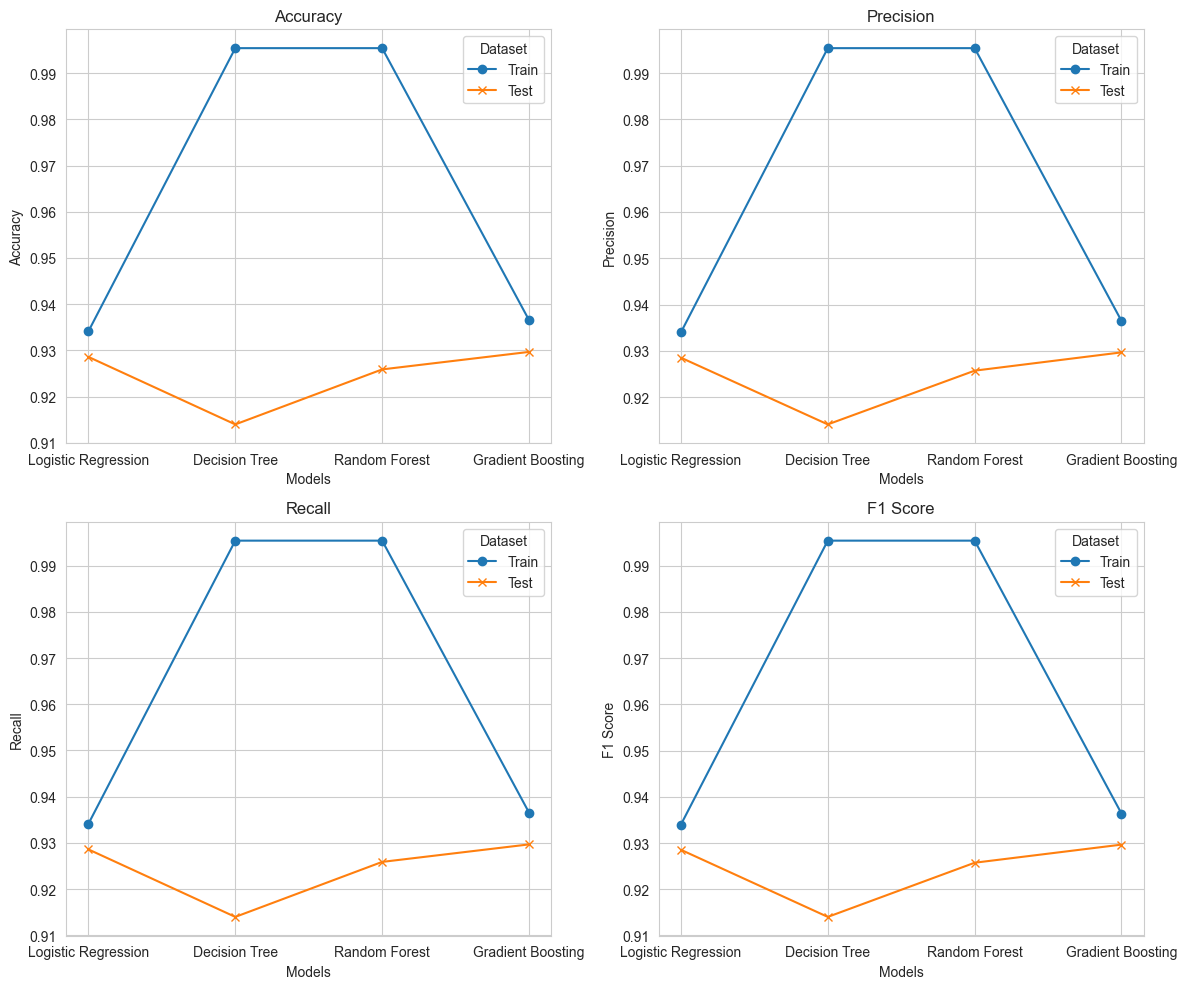

In [38]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Evaluate models on training set and store results
train_results = {}
for name, model in models.items():  # Loop through all models
    y_train_pred = model.predict(X_train)  # Predict on training data
    train_report = classification_report(y_train, y_train_pred, output_dict=True)  # Generate classification report

    # Store evaluation metrics
    train_results[name] = {
        'Accuracy': train_report['accuracy'],
        'Precision': train_report['weighted avg']['precision'],
        'Recall': train_report['weighted avg']['recall'],
        'F1 Score': train_report['weighted avg']['f1-score']
    }

    # Print training set classification report
    print(f"{name} Training Classification Report:\n")
    print(classification_report(y_train, y_train_pred))
    print("-" * 60)

# Define metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create 2x2 subplots
axes = axes.flatten()  # Flatten into a 1D array for easier iteration

for i, metric in enumerate(metrics):
    train_scores = [train_results[model][metric] for model in models]  # Get train scores
    test_scores = [results[model][metric] for model in models]  # Get test scores

    axes[i].plot(list(models.keys()), train_scores, label='Train', marker='o')  # Plot training scores
    axes[i].plot(list(models.keys()), test_scores, label='Test', marker='x')  # Plot test scores

    axes[i].set_title(metric)  # Set title for subplot
    axes[i].set_xlabel('Models')  # Label x-axis
    axes[i].set_ylabel(metric)  # Label y-axis
    axes[i].legend(title="Dataset", loc="best")  # Add legend to each subplot

plt.tight_layout()  # Adjust layout for better visibility
plt.show()  # Show the plot


In [ ]:
# Print training vs test scores for each model
print(f"{'Model':<25}{'Train Accuracy':<15}{'Test Accuracy':<15}{'Train F1':<15}{'Test F1':<15}")
print("-" * 75)

for name in models.keys():
    train_acc = train_results[name]['Accuracy']
    test_acc = results[name]['Accuracy']
    train_f1 = train_results[name]['F1 Score']
    test_f1 = results[name]['F1 Score']
    
    print(f"{name:<25}{train_acc:<15.4f}{test_acc:<15.4f}{train_f1:<15.4f}{test_f1:<15.4f}")

# Check if training accuracy is much higher than test accuracy, indicating overfitting
print("\nOverfitting Check:")
for name in models.keys():
    train_acc = train_results[name]['Accuracy']
    test_acc = results[name]['Accuracy']
    if train_acc - test_acc > 0.1:
        print(f"{name} might be overfitting (Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f})")
    else:
        print(f"{name} seems okay (Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f})")


Model                    Train Accuracy Test Accuracy  Train F1       Test F1        
---------------------------------------------------------------------------
Logistic Regression      0.9341         0.9286         0.9340         0.9285         
Decision Tree            0.9954         0.9113         0.9954         0.9113         
Random Forest            0.9954         0.9280         0.9954         0.9279         
Gradient Boosting        0.9366         0.9297         0.9364         0.9297         

Overfitting Check:
Logistic Regression seems okay (Train Acc: 0.9341, Test Acc: 0.9286)
Decision Tree seems okay (Train Acc: 0.9954, Test Acc: 0.9113)
Random Forest seems okay (Train Acc: 0.9954, Test Acc: 0.9280)
Gradient Boosting seems okay (Train Acc: 0.9366, Test Acc: 0.9297)
